<a href="https://colab.research.google.com/github/Risingresearchlab/AI-driven-6G-PEO-review/blob/main/graph_for_review_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

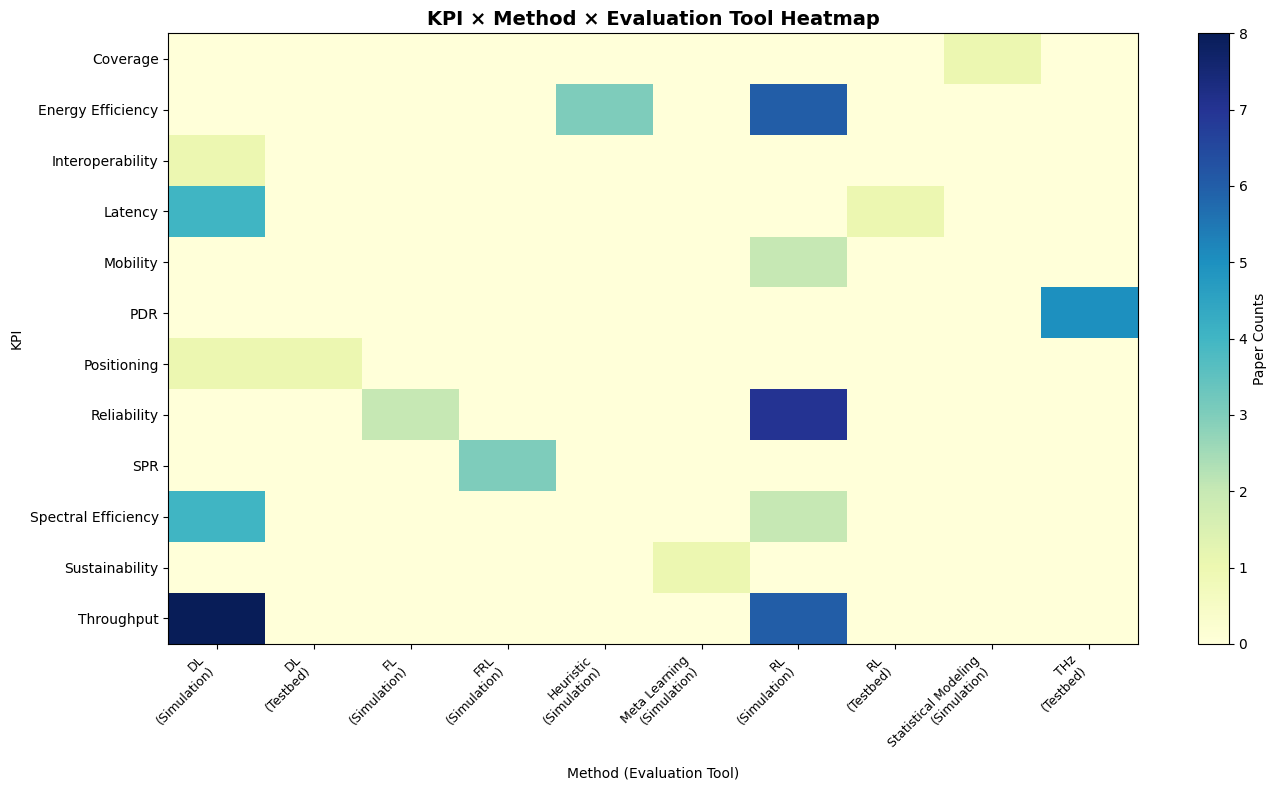

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# === Step 1: Create the dataset ===
data = {
    "KPI": ["PDR", "Throughput", "Throughput", "Latency", "Latency", "Reliability", "Reliability",
            "Energy Efficiency", "Energy Efficiency", "Positioning", "Positioning", "Spectral Efficiency",
            "Spectral Efficiency", "SPR", "Coverage", "Interoperability", "Mobility", "Sustainability"],
    "Method": ["THz", "RL", "DL", "DL", "RL", "FL", "RL", "RL", "Heuristic", "DL", "DL", "DL", "RL",
               "FRL", "Statistical Modeling", "DL", "RL", "Meta Learning"],
    "Evaluation Tool": ["Testbed", "Simulation", "Simulation", "Simulation", "Testbed", "Simulation", "Simulation",
                        "Simulation", "Simulation", "Simulation", "Testbed", "Simulation", "Simulation", "Simulation",
                        "Simulation", "Simulation", "Simulation", "Simulation"],
    "Paper counts": [5, 6, 8, 4, 1, 2, 7, 6, 3, 1, 1, 4, 2, 3, 1, 1, 2, 1]
}

df = pd.DataFrame(data)

# === Step 2: Pivot table ===
pivot_df = df.pivot_table(index="KPI", columns=["Method", "Evaluation Tool"],
                          values="Paper counts", aggfunc="sum", fill_value=0)

# === Step 3: Plot heatmap ===
plt.figure(figsize=(14, 8))
plt.imshow(pivot_df, cmap="YlGnBu", aspect="auto")
plt.colorbar(label="Paper Counts")

# === Step 4: Customize axes ===
plt.xticks(range(len(pivot_df.columns)),
           [f"{m}\n({t})" for m, t in pivot_df.columns],
           rotation=45, ha="right", fontsize=9)
plt.yticks(range(len(pivot_df.index)), pivot_df.index, fontsize=10)
plt.title("KPI × Method × Evaluation Tool Heatmap", fontsize=14, weight="bold")
plt.xlabel("Method (Evaluation Tool)")
plt.ylabel("KPI")

plt.tight_layout()
plt.show()


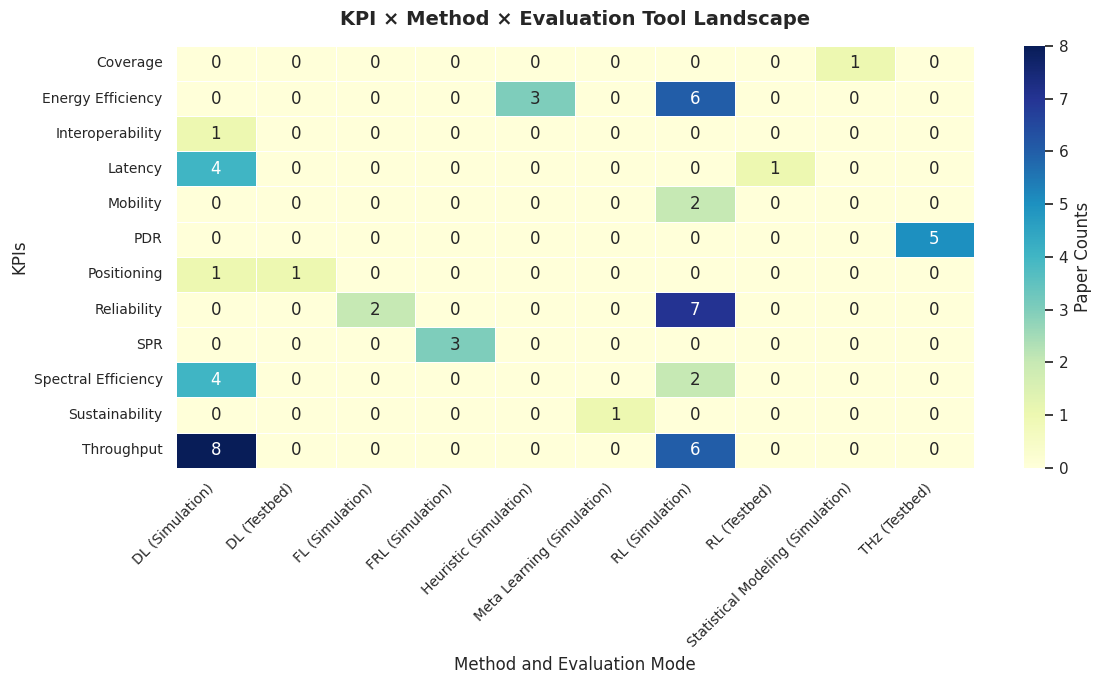

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Step 1: Data ===
data = {
    "KPI": ["PDR", "Throughput", "Throughput", "Latency", "Latency", "Reliability", "Reliability",
            "Energy Efficiency", "Energy Efficiency", "Positioning", "Positioning", "Spectral Efficiency",
            "Spectral Efficiency", "SPR", "Coverage", "Interoperability", "Mobility", "Sustainability"],
    "Method": ["THz", "RL", "DL", "DL", "RL", "FL", "RL", "RL", "Heuristic", "DL", "DL", "DL", "RL",
               "FRL", "Statistical Modeling", "DL", "RL", "Meta Learning"],
    "Evaluation Tool": ["Testbed", "Simulation", "Simulation", "Simulation", "Testbed", "Simulation", "Simulation",
                        "Simulation", "Simulation", "Simulation", "Testbed", "Simulation", "Simulation", "Simulation",
                        "Simulation", "Simulation", "Simulation", "Simulation"],
    "Paper counts": [5, 6, 8, 4, 1, 2, 7, 6, 3, 1, 1, 4, 2, 3, 1, 1, 2, 1]
}

df = pd.DataFrame(data)

# Combine Method and Evaluation Tool for compact labeling
df["Method (Tool)"] = df["Method"] + " (" + df["Evaluation Tool"] + ")"

# === Step 2: Pivot ===
pivot_df = df.pivot_table(index="KPI", columns="Method (Tool)",
                          values="Paper counts", aggfunc="sum", fill_value=0)

# === Step 3: Plot with Seaborn ===
plt.figure(figsize=(12, 7))
sns.set_theme(style="whitegrid", font_scale=1.0)
ax = sns.heatmap(pivot_df, annot=True, fmt=".0f", cmap="YlGnBu",
                 linewidths=0.5, cbar_kws={'label': 'Paper Counts'})

# === Step 4: Customize aesthetics ===
plt.title("KPI × Method × Evaluation Tool Landscape", fontsize=14, weight='bold', pad=15)
plt.xlabel("Method and Evaluation Mode", fontsize=12)
plt.ylabel("KPIs", fontsize=12)
ax.grid(True, color='lightgray', linestyle='--', linewidth=0.3, axis='both')

plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


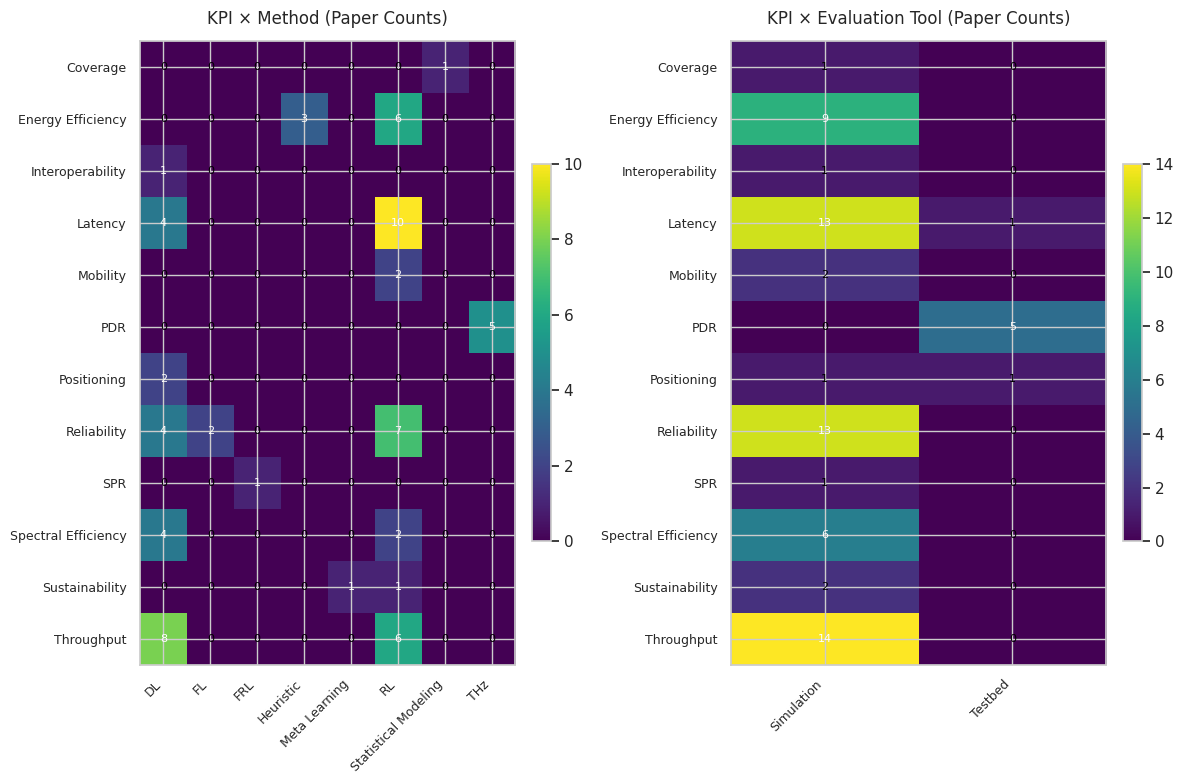

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# 1. Data from your provided table
# -------------------------------
data = [
    ("PDR", "THz", "Testbed", 5),
    ("Throughput", "RL", "Simulation", 6),
    ("Throughput", "DL", "Simulation", 8),
    ("Latency", "DL", "Simulation", 4),
    ("Latency", "RL", "Testbed", 1),
    ("Latency", "RL", "Simulation", 9),
    ("Reliability", "DL", "Simulation", 4),
    ("Reliability", "FL", "Simulation", 2),
    ("Reliability", "RL", "Simulation", 7),
    ("Energy Efficiency", "RL", "Simulation", 6),
    ("Energy Efficiency", "Heuristic", "Simulation", 3),
    ("Positioning", "DL", "Simulation", 1),
    ("Positioning", "DL", "Testbed", 1),
    ("Spectral Efficiency", "DL", "Simulation", 4),
    ("Spectral Efficiency", "RL", "Simulation", 2),
    ("SPR", "FRL", "Simulation", 1),
    ("Coverage", "Statistical Modeling", "Simulation", 1),
    ("Interoperability", "DL", "Simulation", 1),
    ("Mobility", "RL", "Simulation", 2),
    ("Sustainability", "RL", "Simulation", 1),
    ("Sustainability", "Meta Learning", "Simulation", 1),
]

df = pd.DataFrame(data, columns=["KPI", "Method", "Evaluation", "Count"])

# -------------------------------
# 2. Create pivot tables
# -------------------------------
pivot_method = df.pivot_table(index="KPI", columns="Method", values="Count", aggfunc="sum", fill_value=0)
pivot_eval = df.pivot_table(index="KPI", columns="Evaluation", values="Count", aggfunc="sum", fill_value=0)

# -------------------------------
# 3. Helper function to plot heatmap
# -------------------------------
def draw_heatmap(ax, matrix, title):
    im = ax.imshow(matrix.values, aspect="auto", cmap="viridis")
    ax.set_xticks(np.arange(matrix.shape[1]))
    ax.set_yticks(np.arange(matrix.shape[0]))
    ax.set_xticklabels(matrix.columns, rotation=45, ha="right", fontsize=9)
    ax.set_yticklabels(matrix.index, fontsize=9)
    ax.set_title(title, fontsize=12, pad=12)

    # Annotate values
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            val = matrix.values[i, j]
            ax.text(j, i, f"{val}", ha="center", va="center", color="white" if val > matrix.values.mean() else "black", fontsize=8)

    return im

# -------------------------------
# 4. Plot both heatmaps side-by-side
# -------------------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 8))

im1 = draw_heatmap(axes[0], pivot_method, "KPI × Method (Paper Counts)")
im2 = draw_heatmap(axes[1], pivot_eval, "KPI × Evaluation Tool (Paper Counts)")

# Add colorbars
cbar1 = fig.colorbar(im1, ax=axes[0], fraction=0.046, pad=0.04)
cbar2 = fig.colorbar(im2, ax=axes[1], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.savefig("KPI_Heatmaps_Combined.png", dpi=400, bbox_inches="tight")
plt.show()


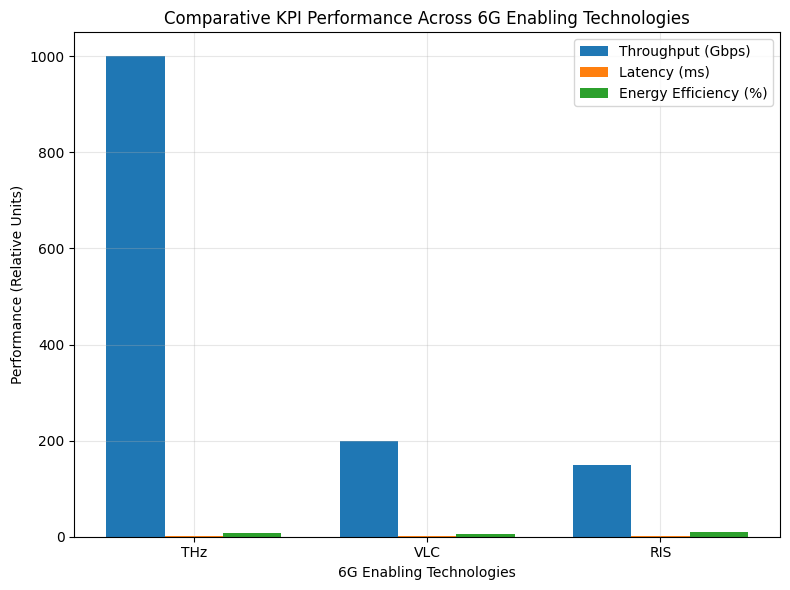

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Technologies
tech = ['THz', 'VLC', 'RIS']

# KPI improvements (approximate values from your cited studies)
throughput = [1000, 200, 150]   # in Gbps
latency = [0.9, 1.2, 1.0]       # in ms
energy_eff = [8, 6, 9]          # relative score or improvement %

x = np.arange(len(tech))
width = 0.25

plt.figure(figsize=(8,6))
plt.bar(x - width, throughput, width, label='Throughput (Gbps)')
plt.bar(x, latency, width, label='Latency (ms)')
plt.bar(x + width, energy_eff, width, label='Energy Efficiency (%)')

plt.xlabel('6G Enabling Technologies')
plt.ylabel('Performance (Relative Units)')
plt.title('Comparative KPI Performance Across 6G Enabling Technologies')
plt.xticks(x, tech)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


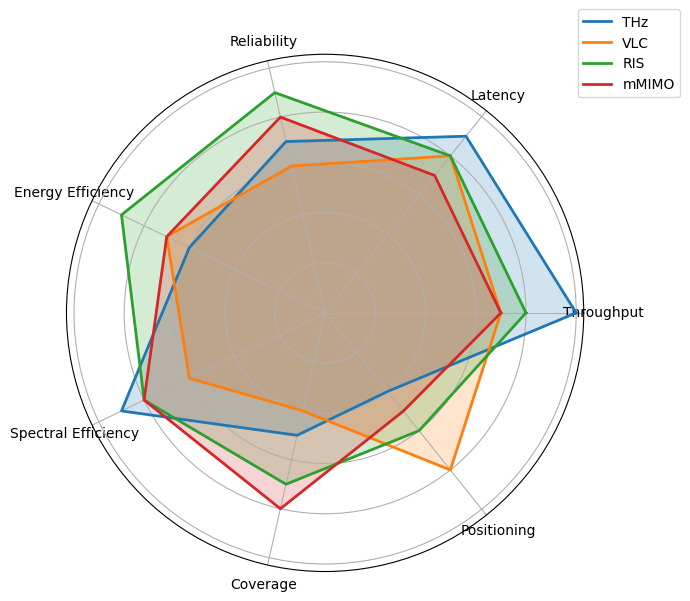

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# KPIs
kpis = ['Throughput', 'Latency', 'Reliability', 'Energy Efficiency', 'Spectral Efficiency', 'Coverage', 'Positioning']

# Normalized KPI scores (0–10 scale based on reported performance)
THz = [10, 9, 7, 6, 9, 5, 4]       # Excellent throughput, low latency
VLC = [7, 8, 6, 7, 6, 4, 8]        # Strong in latency & positioning
RIS = [8, 8, 9, 9, 8, 7, 6]        # Balanced in reliability & energy
mMIMO = [7, 7, 8, 7, 8, 8, 5]      # Stable across most KPIs

# Setup radar chart
labels = np.array(kpis)
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
THz += THz[:1]
VLC += VLC[:1]
RIS += RIS[:1]
mMIMO += mMIMO[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))

ax.plot(angles, THz, label='THz', linewidth=2)
ax.fill(angles, THz, alpha=0.2)
ax.plot(angles, VLC, label='VLC', linewidth=2)
ax.fill(angles, VLC, alpha=0.2)
ax.plot(angles, RIS, label='RIS', linewidth=2)
ax.fill(angles, RIS, alpha=0.2)
ax.plot(angles, mMIMO, label='mMIMO', linewidth=2)
ax.fill(angles, mMIMO, alpha=0.2)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=10)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
#plt.title('Comparative KPI Performance Across 6G Enabling Technologies', fontsize=12, weight='bold')
plt.tight_layout()
plt.show()


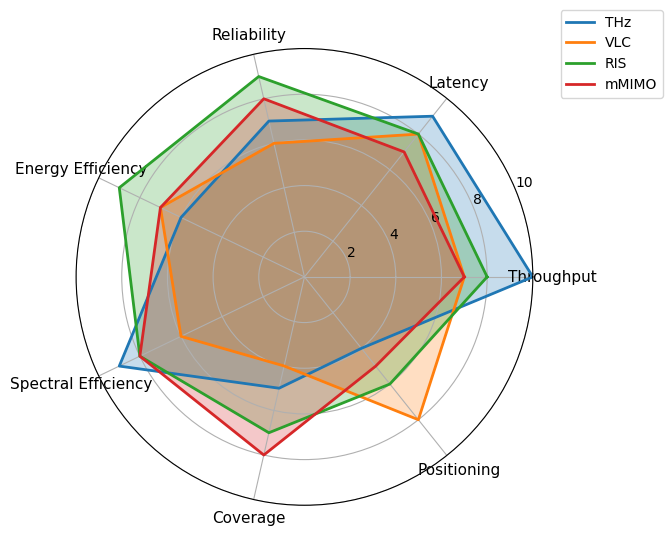

In [ ]:
# Improvements for clarity and publication quality
import matplotlib.pyplot as plt
import numpy as np

labels = ['Throughput', 'Latency', 'Reliability', 'Energy Efficiency',
          'Spectral Efficiency', 'Coverage', 'Positioning']
num_vars = len(labels)

# Normalized values (0–10 scale) — already established
THz = [10, 9, 7, 6, 9, 5, 4]
VLC = [7, 8, 6, 7, 6, 4, 8]
RIS = [8, 8, 9, 9, 8, 7, 6]
mMIMO = [7, 7, 8, 7, 8, 8, 5]

data = [THz, VLC, RIS, mMIMO]
techs = ['THz', 'VLC', 'RIS', 'mMIMO']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # IEEE-style color palette

angles = np.linspace(0, 2*np.pi, num_vars, endpoint=False).tolist()
THz += THz[:1]; VLC += VLC[:1]; RIS += RIS[:1]; mMIMO += mMIMO[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(7,7), subplot_kw=dict(polar=True))
plt.xticks(angles[:-1], labels, fontsize=11)
plt.yticks([2,4,6,8,10], color="black", size=10)
plt.ylim(0,10)

for i, d in enumerate(data):
    ax.plot(angles, d, color=colors[i], linewidth=2, label=techs[i])
    ax.fill(angles, d, color=colors[i], alpha=0.25)

plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
#plt.title("Comparative KPI Trends Across 6G Enabling Technologies", size=13, y=1.08)
plt.tight_layout()
plt.show()
